<a href="https://colab.research.google.com/github/tramyynt/COVID-19-impact-on-Digital-Learning-/blob/main/Covid_19_Impact_on_Digital_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Covid Impact on Digital Learning**:
This notebook is to uncover some trends in digital learning.

### **Problem Statement**
The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

### **What should focus on ?**


1.   What is the picture of digital connectivity and engagement in 2020?
2.   What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?
3. How does student engagement with different types of education technology change over the course of the pandemic?
4. How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?
5. Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?






## Data Preparation


1.   Import neccessary libs
2.   Get data from Kaggle API 



In [1]:
import numpy as np 
import pandas as pd

import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
!pip install -U -q kaggle==1.5.8

     |████████████████████████████████| 59 kB 2.1 MB/s 


In [15]:
!ls -la /root/

total 64
drwx------ 1 root root 4096 Sep  5 11:30 .
drwxr-xr-x 1 root root 4096 Sep  5 11:26 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Sep  5 11:30 .cache
drwxr-xr-x 1 root root 4096 Sep  2 13:19 .config
drwxr-xr-x 3 root root 4096 Sep  1 19:26 .gsutil
drwxr-xr-x 5 root root 4096 Sep  2 13:19 .ipython
drwx------ 2 root root 4096 Sep  2 13:19 .jupyter
drwxr-xr-x 2 root root 4096 Sep  5 11:30 .kaggle
drwxr-xr-x 2 root root 4096 Sep  5 11:26 .keras
drwx------ 1 root root 4096 Sep  2 13:19 .local
drwxr-xr-x 4 root root 4096 Sep  2 13:19 .npm
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf


In [10]:
#!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
# MUST UPLOAD kaggle.json FIRST: download kaggle.json by getting expired token and creating a new API token --> get a latest json file
# move kaggle.json to /root/.kaggle
!cp /kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [18]:
!kaggle competitions download -c "learnplatform-covid19-impact-on-digital-learning" 

 85% 105M/124M [00:00<00:00, 169MB/s] 
100% 124M/124M [00:00<00:00, 157MB/s]


In [19]:
# unzip data
!unzip '*.zip'

Archive:  learnplatform-covid19-impact-on-digital-learning.zip
  inflating: README.md               
  inflating: districts_info.csv      
  inflating: engagement_data/1000.csv  
  inflating: engagement_data/1039.csv  
  inflating: engagement_data/1044.csv  
  inflating: engagement_data/1052.csv  
  inflating: engagement_data/1131.csv  
  inflating: engagement_data/1142.csv  
  inflating: engagement_data/1179.csv  
  inflating: engagement_data/1204.csv  
  inflating: engagement_data/1270.csv  
  inflating: engagement_data/1324.csv  
  inflating: engagement_data/1444.csv  
  inflating: engagement_data/1450.csv  
  inflating: engagement_data/1470.csv  
  inflating: engagement_data/1536.csv  
  inflating: engagement_data/1549.csv  
  inflating: engagement_data/1558.csv  
  inflating: engagement_data/1570.csv  
  inflating: engagement_data/1584.csv  
  inflating: engagement_data/1624.csv  
  inflating: engagement_data/1705.csv  
  inflating: engagement_data/1712.csv  
  inflating: engageme

In [20]:
# get file name and assign to a new column district_id
files = glob.glob("engagement_data/*.csv")
list_of_df = [pd.read_csv(file).assign(district_id=os.path.basename(file).strip(".csv")) for file in files] 
#list_of_df = [pd.read_csv(file) for file in files]

In [21]:
engagement = pd.concat(list_of_df, ignore_index= True)

In [22]:
districts = pd.read_csv("districts_info.csv")
products = pd.read_csv("products_info.csv")

In [332]:
#work with missing values in districts
print('% missing value:', districts.isnull().sum()/len(districts))
districts = districts[districts.state.notna()].reset_index(drop = False)

% missing value: district_id                 0.000000
state                       0.244635
locale                      0.244635
pct_black/hispanic          0.244635
pct_free/reduced            0.364807
county_connections_ratio    0.304721
pp_total_raw                0.493562
dtype: float64


From a glimpse, we can see the county_connections_ration has 3 values: NaN, [0.18, 1] and [1, 2]. However, [1,2] is only for one data point, so it is not valuable. Thus, we take only [0.18, 1]

In [333]:
districts = districts[districts['county_connections_ratio']=='[0.18, 1[']

In [24]:
# convert datetime type, district_id to int64 (same as districts)
engagement['time'] = pd.to_datetime(engagement['time'])
engagement['district_id']= engagement['district_id'].astype(str).astype(int)

In [ ]:
# get dummies sector for products.
# sectors = products['Sector(s)'].str.get_dummies(sep="; ")
# sectors.columns = [f"sector_{re.sub(' ', '', c)}" for c in sectors.columns]
# products = products.join(sectors)
# products.drop("Sector(s)", axis=1, inplace=True)

# del sectors

#Remove punctuations
pd.options.mode.chained_assignment = None
for i in [' ', '.']:
    for k in range(len(products)):
        if pd.isna(products['Provider/Company Name'][k]) == False:
            products['Provider/Company Name'][k] = products['Provider/Company Name'][k].strip(i)

#split the sub categories
products['funct_main'] = products['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products['funct_sub'] = products['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

# Synchronize similar values
products['funct_sub'] = products['funct_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})
products.drop("Primary Essential Function", axis=1, inplace=True)

## **Exploratory Data Analysis**

### 1. Districts
The district file districts_info.csv includes information about the characteristics of school districts, including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab. In this data set, we removed the identifiable information about the school districts. We also used an open source tool ARX (Prasser et al. 2020) to transform several data fields and reduce the risks of re-identification. For data generalization purposes some data points are released with a range where the actual value falls under. Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset.


**Number of school districts per state**

In [302]:
districts_by_state = districts['state'].value_counts().to_frame().reset_index()
districts_by_state.columns = ['state','count_districts']
districts_by_state

,state,count_districts
0,Utah,29
1,Illinois,18
2,Indiana,7
3,Washington,6
4,New York,5
5,Missouri,5
6,North Carolina,4
7,Virginia,3
8,Wisconsin,3
9,New Jersey,2


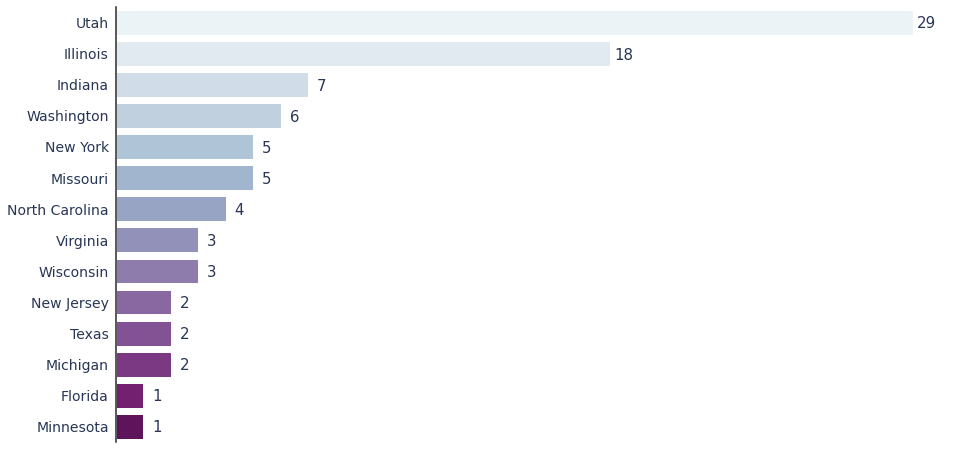

In [359]:
#using built-in United States Choropleth Map
us_state = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
districts_by_state['state_abbrev'] = districts_by_state['state'].replace(us_state) #https://stackoverflow.com/questions/40075106/replace-values-in-pandas-series-with-dictionary
fig = go.Figure()
layout = dict(
    title_text = "Number of School Districts per State",
    geo_scope='usa',
)

fig.add_trace(
    go.Choropleth(
        locations=districts_by_state.state_abbrev,
        zmax=1,
        z = districts_by_state.count_districts,
        locationmode = 'USA-states',
        marker_line_color='white',
        geo='geo',
        colorscale = 'BuPu', 
    )
)
            
fig.update_layout(layout)   
fig.show()

plt.figure(figsize = (15, 8))
sns.set_style("white")
a = sns.barplot(data = districts['state'].value_counts().reset_index(), x = 'state', y = 'index', palette='BuPu')
plt.xticks([])
plt.yticks(fontname = 'arial', fontsize = 14, color = '#283655')
plt.ylabel('')
plt.xlabel('')
a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)
    
for p in a.patches:
    width = p.get_width()
    plt.text(0.5 + width, p.get_y() + 0.55 * p.get_height(), f'{int(width)}',
             ha = 'center', va = 'center', fontname = 'arial', fontsize = 15, color = '#283655')

plt.show()


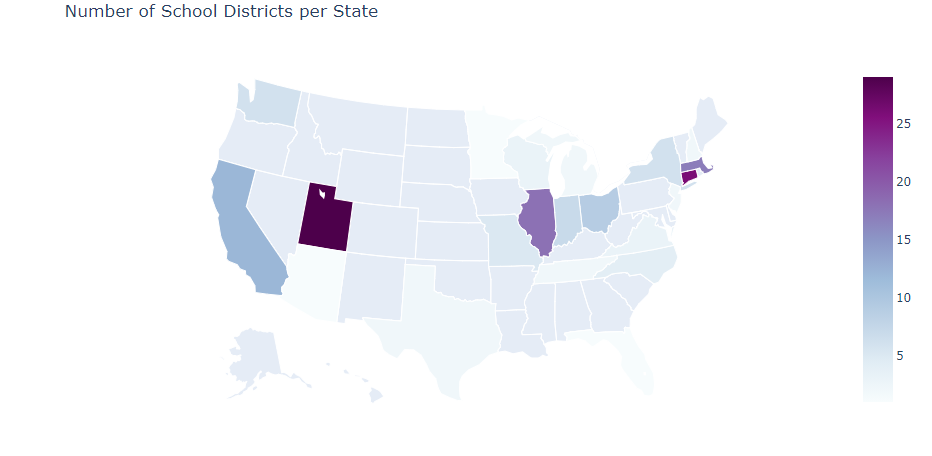

 As you can see in above plot, the available data does not cover all the states in the U.S. (19/50). The states with the most available school districts are UT (29) and CT (26) while there are also states with only one school district (FL, TN, NY, AZ) ( Github does not support interactive plot so i have to supply a picture)

In [366]:
fig = px.pie(districts['locale'].value_counts().reset_index().rename(columns = {'locale': 'count'}), values = 'count', names = 'index', width = 650, height = 650)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.7, 
                  marker = dict(colors = ['#90afc5','#336b87','#2a3132','#763626'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = ' The count of districts <br>in each type <br>of areas', 
                                      x = 0.5, y = 0.5, font_size = 20, showarrow = False, 
                                      font_family = 'arial',
                                      font_color = '#283655')],
                  showlegend = False)
                  
fig.show()

*Looking at the count plot, we can see more than 50% school districts located in suburb.*

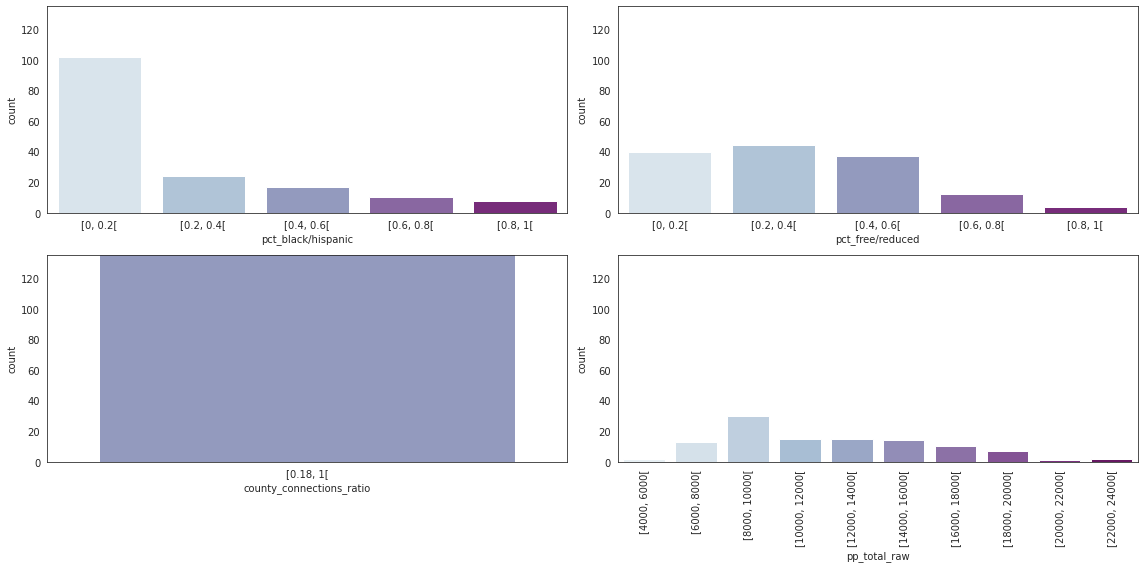

In [233]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

sns.countplot(data=districts, x='pct_black/hispanic', order=['[0, 0.2[', '[0.2, 0.4[', '[0.4, 0.6[', '[0.6, 0.8[','[0.8, 1[', ], palette='BuPu', ax=ax[0,0])
ax[0,0].set_ylim([0,135])
sns.countplot(data=districts, x='pct_free/reduced', order=['[0, 0.2[', '[0.2, 0.4[', '[0.4, 0.6[', '[0.6, 0.8[','[0.8, 1[', ], palette='BuPu', ax=ax[0,1])
ax[0,1].set_ylim([0,135])

sns.countplot(data=districts, x='county_connections_ratio',palette='BuPu', ax=ax[1,0])
ax[1,0].set_ylim([0,135])
sns.countplot(data=districts, x='pp_total_raw', order=['[4000, 6000[', '[6000, 8000[', '[8000, 10000[', '[10000, 12000[',
       '[12000, 14000[', '[14000, 16000[', '[16000, 18000[', 
       '[18000, 20000[', '[20000, 22000[', '[22000, 24000[', ], palette='BuPu', ax=ax[1,1])
ax[1,1].set_ylim([0,135])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Looking at those plots above, we can point out that:

Almost all observations have the same interval [0.18, 1] for ratio of connection, so this charateristics will not be valuable in the further analysis.


However, in order to know deeper about how 3 characteristics depend on locale, we will see it on the heatmap.


**Heatmap of Districts According to Locale and pp_total_raw**

In [360]:
def heatmap(df , col1, col2):
  temp = df.groupby(col1)[col2].value_counts().to_frame()
  temp.columns = ['amount']
  temp = temp.reset_index(drop=False)
  temp = temp.pivot(index=col1, columns=col2)['amount']
  return temp

In [62]:
total_raw = heatmap(districts, 'locale', 'pp_total_raw')
total_raw= total_raw[['[4000, 6000[', '[6000, 8000[', '[8000, 10000[', '[10000, 12000[',
       '[12000, 14000[', '[14000, 16000[', '[16000, 18000[', 
       '[18000, 20000[', '[20000, 22000[', '[22000, 24000[', ]]

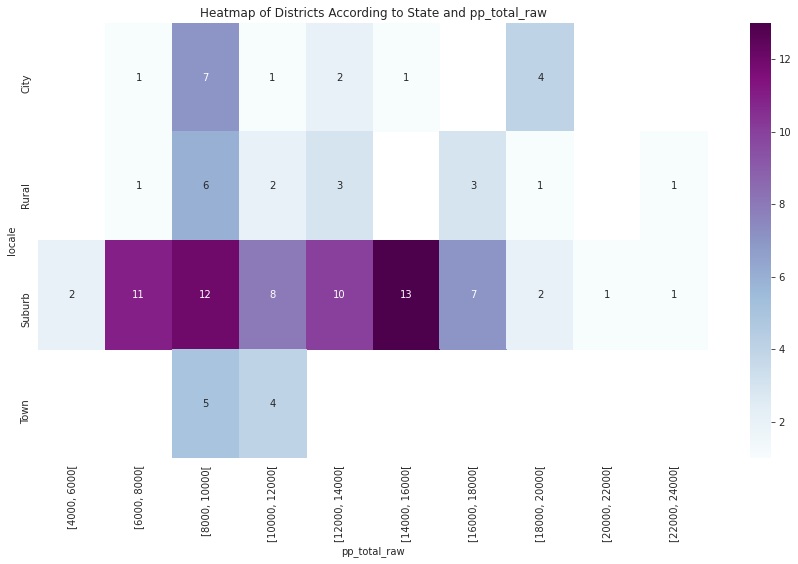

In [83]:
plt.figure(figsize = (15, 8))
sns.heatmap(total_raw, annot=True, cmap='BuPu').set_title('Heatmap of Districts According to State and pp_total_raw')
plt.show()

**Heatmap of Districts According to Locale and pct_black/hispanic**

In [361]:
pct_black = heatmap(districts, 'locale', 'pct_black/hispanic')

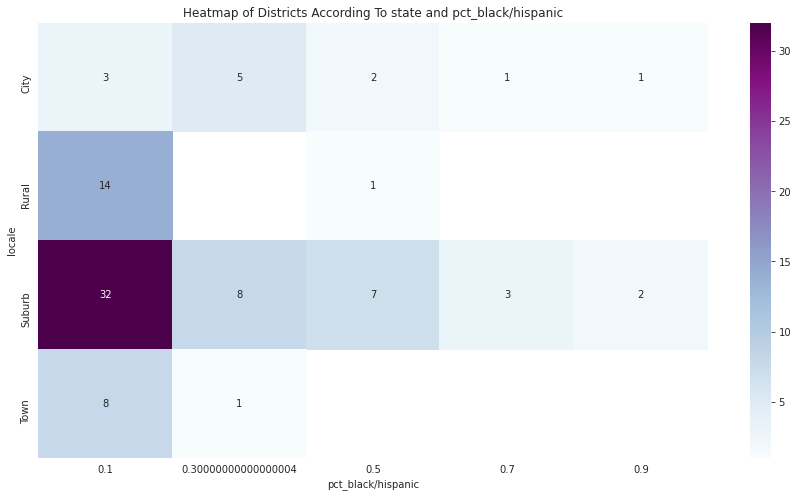

In [362]:
plt.figure(figsize = (15, 8))
sns.heatmap(pct_black, annot=True,  cmap='BuPu').set_title('Heatmap of Districts According To state and pct_black/hispanic')
plt.show()

**Heatmap of Districts According to Locale and pct_free/reduced**

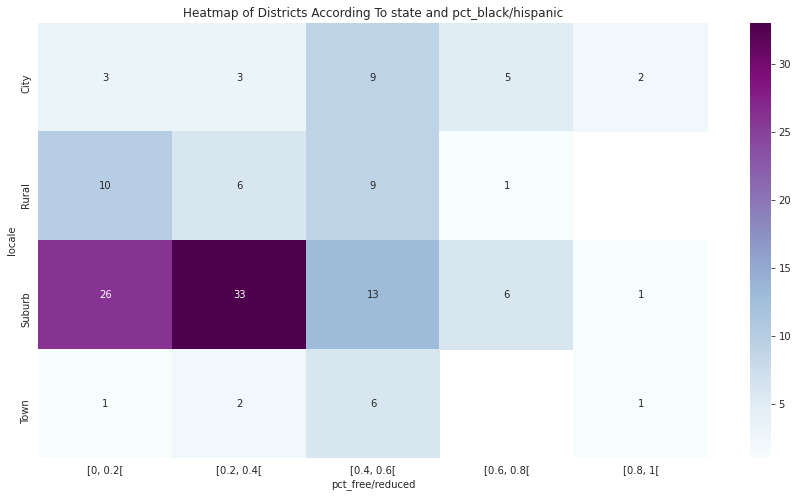

In [82]:
plt.figure(figsize = (15, 8))
pct_free = heatmap(districts, 'locale', 'pct_free/reduced')
sns.heatmap(pct_free, annot=True,  cmap='BuPu').set_title('Heatmap of Districts According To state and pct_black/hispanic')
plt.show()

Since values of pct_black/hispanic and pct_free/reduced, pp_total_raw are presented as intervals, so we have to replace them by mean of those intervals.
As mentioned above, the county_connections_ratio is the same for every data point, so we drop this column.
On top of that, we deal with numerical values, thus we'd better to reduce all nan values.

In [334]:
districts.dropna(inplace= True)

In [335]:
for i in ['pct_black/hispanic', 'pct_free/reduced']:
    districts[i] = districts[i].apply(lambda x: float(x.split(',')[0][1:]) + 0.1)

districts['pp_total_raw'] = districts['pp_total_raw'].apply(lambda x: int(x.split(',')[0][1:]) + 1000)

districts.drop('county_connections_ratio', axis = 1, inplace = True)

districts.head(5)


,index,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,0,8815,Illinois,Suburb,0.1,0.1,15000
1,2,4921,Utah,Suburb,0.1,0.3,7000
2,5,5987,Wisconsin,Suburb,0.1,0.1,11000


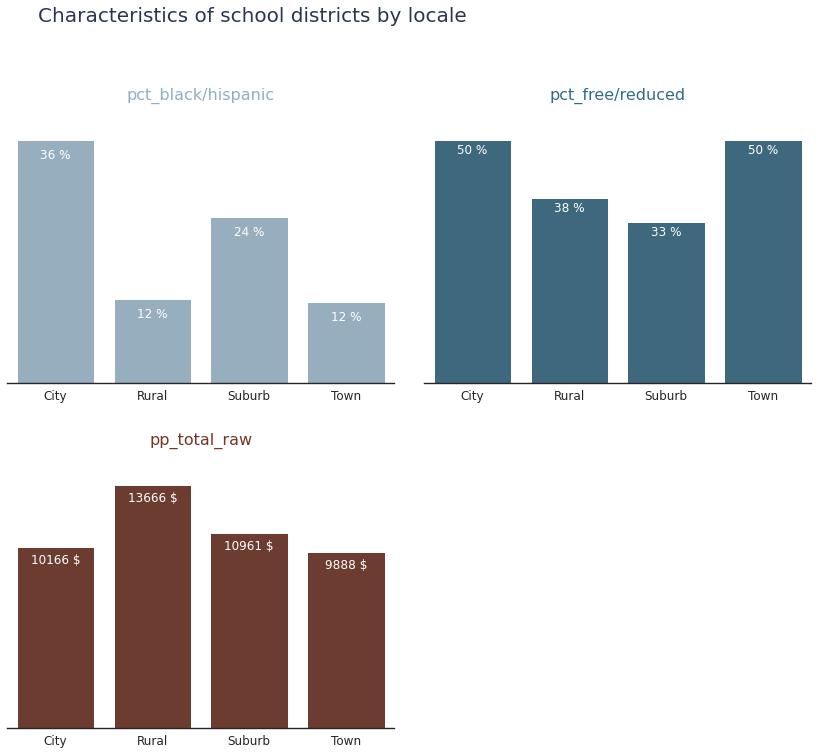

In [354]:
dist_area_group = districts.groupby('locale').agg({'pct_black/hispanic': 'mean', 'pct_free/reduced': 'mean', 'pp_total_raw': 'mean'}).reset_index()

colors = ['#90afc5', '#336b87', '#763626']

fig = plt.figure(figsize = (12,10))
for i in range(len(dist_area_group.columns.tolist()[1:])):
    plt.subplot(2, 2, i+1)
    sns.set_style("white")
    plt.title(dist_area_group.columns.tolist()[1:][i], size = 16, fontname = 'arial', y = 1.09, color = colors[i])
    plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
    a = sns.barplot(data = dist_area_group, x = 'locale', y = dist_area_group.columns.tolist()[1:][i], color = colors[i])
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(fontname = 'arial', size = 12)
    plt.yticks([])
    
    for j in ['right', 'top', 'left']:
        a.spines[j].set_visible(False)
    for j in ['bottom']:
        a.spines[j].set_linewidth(1.4)
      
    if i < 2:
        for p in a.patches:
            height = p.get_height()
            a.annotate(f'{int(height*100)} %', (p.get_x() + p.get_width() / 2, p.get_height()-0.03), 
                   ha = 'center', va = 'center', 
                   size = 12,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   color = 'white',
                   fontname = 'arial')
    else:
        for p in a.patches:
            height = p.get_height()
            a.annotate(f'{int(height)} $', (p.get_x() + p.get_width() / 2, p.get_height()-1000), 
                   ha = 'center', va = 'center', 
                   size = 12,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   color = 'white',
                   fontname = 'arial')
            
plt.figtext(0.07, 1.05, 'Characteristics of school districts by locale', fontsize = 20, fontname = 'arial', color = '#283655')
fig.tight_layout(pad = 3)

plt.show()

As we notice that: 

1.   the largest count of students identified as Black or Hispanic are in cities.
2.   50% of the students in cities and towns are eligible
for free or reduced-price lunch.
3. The highest total expenses per student is in rural area.

We can reflect to the heatmaps above, they displays data when all nan values were not removed


### 2. Product

The product file products_info.csv includes information about the characteristics of the top 372 products with most users in 2020. The categories listed in this file are part of LearnPlatform's product taxonomy. Data were labeled by our team. Some products may not have labels due to being duplicate, lack of accurate url or other reasons.

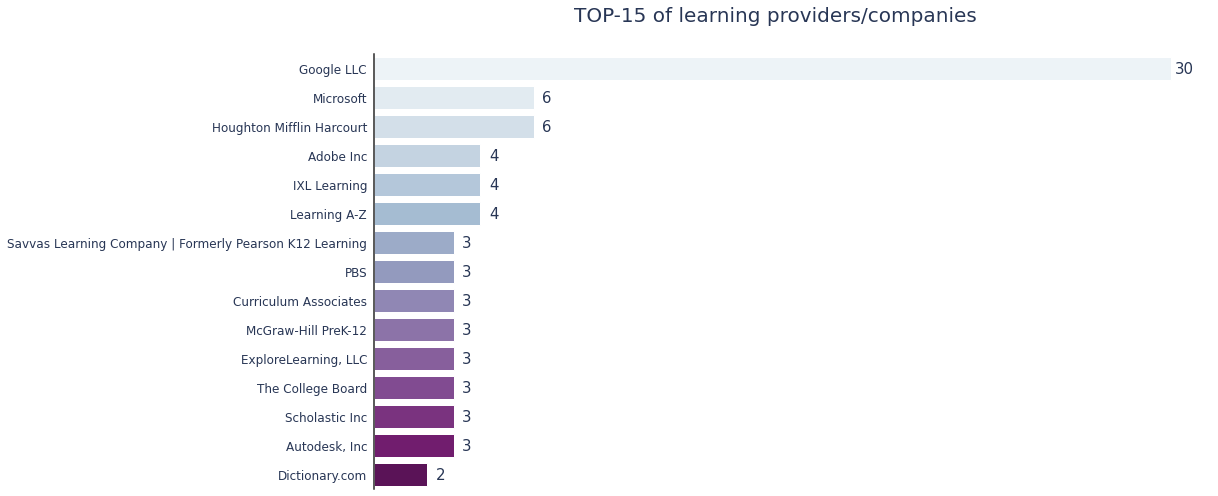

In [364]:
plt.figure(figsize = (15, 8))
plt.title('TOP-15 of learning providers/companies', size = 20, x = 0.48, y = 1.06, fontname = 'arial', color = '#283655')
a = sns.barplot(data = products['Provider/Company Name'].value_counts().reset_index().head(15), x = 'Provider/Company Name', y = 'index', palette='BuPu')
plt.xticks([])
plt.yticks(fontname = 'arial', fontsize = 12, color = '#283655')
plt.ylabel('')
plt.xlabel('')

a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)
    
for p in a.patches:
    width = p.get_width()
    plt.text(0.5 + width, p.get_y() + 0.55 * p.get_height(), f'{int(width)}',
             ha = 'center', va = 'center', fontname = 'arial', fontsize = 15, color = '#283655')
plt.show()


In [365]:
fig = px.pie(products['Sector(s)'].value_counts().reset_index().rename(columns = {'Sector(s)': 'count'}).head(15), values = 'count', names = 'index', width = 650, height = 650)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.7,marker = dict(colors = ['#336b87','#2a3132','#763626']))

fig.update_layout(annotations = [dict(text = 'Sector of education <br>where the product is used', 
                                      x = 0.5, y = 0.5, font_size = 20, showarrow = False, 
                                      font_family = 'arial',
                                      font_color = '#283655')],
                  showlegend = False)
                  
fig.show()

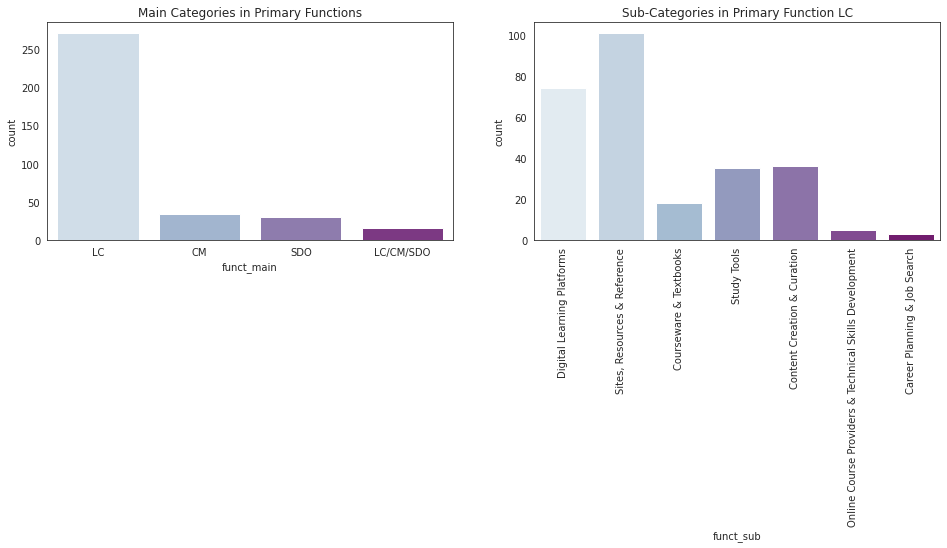

In [142]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(data=products, x='funct_main', palette ='BuPu', ax=ax[0])
ax[0].set_title('Main Categories in Primary Functions')

sns.countplot(data=products[products['funct_main'] == 'LC'], x='funct_sub', palette ='BuPu', ax=ax[1])
ax[1].set_title('Sub-Categories in Primary Function LC')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

### Student Engagement


*   pct_access: % of students in the district have at least one page-load event of a given product and on a given day
*   engagement_index: Total page-load events per 1000 students of a given product and on a given day

In [367]:
engagement.head(5)

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,83862.0,0.01,0.35,9357
1,2020-01-01,11156.0,0.01,0.07,9357
2,2020-01-01,61384.0,0.01,0.07,9357
3,2020-01-01,86812.0,0.01,0.14,9357
4,2020-01-01,17941.0,0.01,0.14,9357
